In [1]:
import fastshap_wrapper as fw

In [2]:
from cifar10_experiment import CIFAR10AugmentationExperiment

In [3]:
import torchvision

In [4]:
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [5]:
c = CIFAR10AugmentationExperiment(transform)
c.train(nepoch=1, batch_size=256, experiment_name='test')

Files already downloaded and verified
Files already downloaded and verified


Training loop:   0%|          | 0/195 [00:00<?, ?it/s]

----- Epoch = 1 -----
Val loss = 1.0655
Val acc = 0.6222

New best epoch, acc = 0.6222



In [6]:
# train_hist = []
# with open('test'+"train_hist.txt", "r") as f:
#   for line in f:
#     train_hist.append(float(line.strip()))
    
# val_hist = []
# with open('test'+"val_hist.txt", "r") as f:
#   for line in f:
#     val_hist.append(float(line.strip()))

# train_hist

# val_hist

In [7]:
# import torch
# torch.load('testcifar resnet.pt').to('cuda')

In [8]:
%%time
results = fw.fastshap_wrapper(c.model, c.train_set, c.test_set, surrogate_epochs=1, explainer_epochs=1, experiment_name='test3')

Loading saved surrogate model
Loading saved explainer model
CPU times: user 41.2 ms, sys: 49.9 ms, total: 91.1 ms
Wall time: 20.1 s


In [12]:
results.plot_results(c.test_set, return_raw=True, num_samples=10)

array([[[ 2.50086337e-02,  2.91446298e-02,  2.61362717e-02, ...,
          1.76088735e-02,  2.22527608e-02,  9.47061926e-03],
        [ 4.38676029e-03,  2.65643001e-02,  1.55830756e-03, ...,
          4.51765954e-05,  3.25846300e-03,  4.71767411e-03],
        [ 6.32509589e-03,  2.90770456e-02, -5.38307428e-03, ...,
          3.12945992e-03,  3.15526873e-03, -2.87708640e-03],
        ...,
        [-1.76160596e-02,  3.06148455e-02, -3.38476896e-03, ...,
          1.57806203e-02,  1.01047307e-02,  7.32539594e-03],
        [-1.21821500e-02,  3.50233167e-02, -1.24081969e-04, ...,
          9.19830799e-03,  4.97127697e-03,  1.55268982e-02],
        [-7.74762779e-03, -2.32368670e-02, -3.74848060e-02, ...,
         -4.60676551e-02, -4.77773212e-02, -4.15448844e-03]],

       [[ 2.54436582e-02,  2.85836011e-02,  2.33298168e-02, ...,
          1.49335712e-02,  2.34940648e-02,  3.25455144e-02],
        [-1.42100789e-02,  1.05188191e-02, -2.02526227e-02, ...,
         -1.58548653e-02,  7.30711222e

<AxesSubplot:ylabel='Density'>

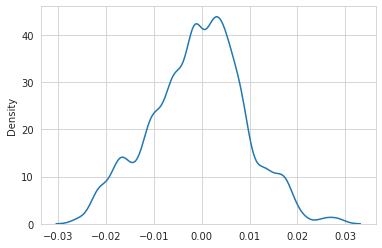

In [16]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(results.plot_results(c.test_set, return_raw=True, num_samples=10).reshape(100,-1).mean(axis=0), bw_adjust=0.5)
